In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
rand_seed = 41
teams_df = pd.read_csv('../data/external/NBA_team_stats_1979-2024.csv')

In [3]:
teams_df.head()

Unnamed: 0 Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5  \
0         Rk     Season       Team          W          G          W   
1          1    2015-16        GSW         73         82         73   
2          2    1995-96        CHI         72         82         72   
3          3    1996-97        CHI         69         82         69   
4          4    2016-17        GSW         67         82         67   

  Unnamed: 6 Unnamed: 7 Team Totals Team Totals.1  ... Team Totals.14  \
0          L       W/L%          MP            FG  ...            BLK   
1          9       .890       19880          3489  ...            498   
2         10       .878       19730          3293  ...            345   
3         13       .841       19730          3277  ...            332   
4         15       .817       19780          3532  ...            555   

  Team Totals.15 Team Totals.16 Team Totals.17 Team Shooting Team Shooting.1  \
0            TOV             PF            PTS           FG%             2P%   
1           1245           1701           9421          .487            .528   
2           1175           1807           8625          .478            .496   
3           1109           1617           8458          .473            .499   
4           1211           1585           9503          .495            .557   

  Team Shooting.2 Team Shooting.3 Team Shooting.4 Team Shooting.5  
0             3P%             FT%             TS%            eFG%  
1            .416            .763            .593          56.258  
2            .403            .746            .555          51.727  
3            .373            .747            .547          51.112  
4            .383            .788            .597          56.345  

[5 rows x 32 columns]

In [4]:
teams_df.columns = teams_df.iloc[0]
teams_df = teams_df[1:]
teams_df = teams_df.reset_index(drop=True)

In [5]:
teams_df

0       Rk   Season Team   W   G   W   L  W/L%     MP    FG  ...  BLK   TOV  \
0        1  2015-16  GSW  73  82  73   9  .890  19880  3489  ...  498  1245   
1        2  1995-96  CHI  72  82  72  10  .878  19730  3293  ...  345  1175   
2        3  1996-97  CHI  69  82  69  13  .841  19730  3277  ...  332  1109   
3        4  2016-17  GSW  67  82  67  15  .817  19780  3532  ...  555  1211   
4        5  2015-16  SAS  67  82  67  15  .817  19705  3289  ...  485  1071   
...    ...      ...  ...  ..  ..  ..  ..   ...    ...   ...  ...  ...   ...   
1200  1196  1997-98  VAN  19  82  19  63  .232  19830  3006  ...  349  1405   
1201  1197  1992-93  MIN  19  82  19  63  .232  19855  3043  ...  455  1422   
1202  1198  1989-90  CHH  19  82  19  63  .232  19755  3270  ...  262  1226   
1203  1199  1987-88  NJN  19  82  19  63  .232  19780  3208  ...  385  1503   
1204  1200  2014-15  PHI  18  82  18  64  .220  19805  2765  ...  487  1453   

0       PF   PTS   FG%   2P%   3P%   FT%   TS%    eFG%  
0     1701  9421  .487  .528  .416  .763  .593  56.258  
1     1807  8625  .478  .496  .403  .746  .555  51.727  
2     1617  8458  .473  .499  .373  .747  .547  51.112  
3     1585  9503  .495  .557  .383  .788  .597  56.345  
4     1433  8490  .484  .515  .375  .803  .564  52.582  
...    ...   ...   ...   ...   ...   ...   ...     ...  
1200  1809  7923  .458  .473  .362  .739  .527  48.249  
1201  2028  8046  .466  .483  .292  .798  .535  47.879  
1202  1889  8232  .455  .466  .336  .756  .511  46.951  
1203  2042  8235  .468  .480  .301  .729  .523  47.783  
1204  1778  7542  .408  .449  .320  .676  .494  45.905  

[1205 rows x 32 columns]

In [6]:
teams_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rk      1205 non-null   object
 1   Season  1205 non-null   object
 2   Team    1205 non-null   object
 3   W       1205 non-null   object
 4   G       1205 non-null   object
 5   W       1205 non-null   object
 6   L       1205 non-null   object
 7   W/L%    1205 non-null   object
 8   MP      1205 non-null   object
 9   FG      1205 non-null   object
 10  FGA     1205 non-null   object
 11  2P      1205 non-null   object
 12  2PA     1205 non-null   object
 13  3P      1205 non-null   object
 14  3PA     1205 non-null   object
 15  FT      1205 non-null   object
 16  FTA     1205 non-null   object
 17  ORB     1205 non-null   object
 18  DRB     1205 non-null   object
 19  TRB     1205 non-null   object
 20  AST     1205 non-null   object
 21  STL     1205 non-null   object
 22  BLK     1205 non-null   

In [7]:
teams_df = teams_df.loc[:,~teams_df.columns.duplicated()]
teams_df = teams_df[teams_df['Season'] != 'Season']
teams_df['Season'] = teams_df['Season'].map(lambda x: int(x[:4]))
teams_df = teams_df.drop(columns=['Rk'])
teams_df = teams_df.apply(lambda col: pd.to_numeric(col, errors='coerce') if col.name != 'Team' else col)

In [8]:
teams_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1200 entries, 0 to 1204
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Season  1200 non-null   int64  
 1   Team    1200 non-null   object 
 2   W       1200 non-null   int64  
 3   G       1200 non-null   int64  
 4   L       1200 non-null   int64  
 5   W/L%    1200 non-null   float64
 6   MP      1200 non-null   int64  
 7   FG      1200 non-null   int64  
 8   FGA     1200 non-null   int64  
 9   2P      1200 non-null   int64  
 10  2PA     1200 non-null   int64  
 11  3P      1200 non-null   int64  
 12  3PA     1200 non-null   int64  
 13  FT      1200 non-null   int64  
 14  FTA     1200 non-null   int64  
 15  ORB     1200 non-null   int64  
 16  DRB     1200 non-null   int64  
 17  TRB     1200 non-null   int64  
 18  AST     1200 non-null   int64  
 19  STL     1200 non-null   int64  
 20  BLK     1200 non-null   int64  
 21  TOV     1200 non-null   int64  
 22  PF   

In [9]:
teams_df.columns

Index(['Season', 'Team', 'W', 'G', 'L', 'W/L%', 'MP', 'FG', 'FGA', '2P', '2PA',
       '3P', '3PA', 'FT', 'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PTS', 'FG%', '2P%', '3P%', 'FT%', 'TS%', 'eFG%'],
      dtype='object', name=0)

In [10]:
for column in ['MP', 'FG', 'FGA', '2P', '2PA', '3P', '3PA', 'FT', 'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']:
    teams_df[f'{column}/G'] = teams_df[column] / teams_df['G']
    teams_df = teams_df.drop(columns=[column])
teams_df = teams_df.rename(columns={'W/L%': 'W%'})

In [11]:
teams_df.head()

0  Season Team   W   G   L     W%    FG%    2P%    3P%    FT%  ...      FTA/G  \
0    2015  GSW  73  82   9  0.890  0.487  0.528  0.416  0.763  ...  21.829268   
1    1995  CHI  72  82  10  0.878  0.478  0.496  0.403  0.746  ...  24.439024   
2    1996  CHI  69  82  13  0.841  0.473  0.499  0.373  0.747  ...  22.536585   
3    2016  GSW  67  82  15  0.817  0.495  0.557  0.383  0.788  ...  22.560976   
4    2015  SAS  67  82  15  0.817  0.484  0.515  0.375  0.803  ...  20.390244   

0      ORB/G      DRB/G      TRB/G      AST/G     STL/G     BLK/G      TOV/G  \
0   9.951220  36.243902  46.195122  28.939024  8.402439  6.073171  15.182927   
1  15.207317  29.402439  44.609756  24.792683  9.085366  4.207317  14.329268   
2  15.060976  30.012195  45.073171  26.121951  8.731707  4.048780  13.524390   
3   9.390244  35.036585  44.426829  30.378049  9.573171  6.768293  14.768293   
4   9.390244  34.524390  43.914634  24.512195  8.256098  5.914634  13.060976   

0       PF/G       PTS/G  
0  20.743902  114.890244  
1  22.036585  105.182927  
2  19.719512  103.146341  
3  19.329268  115.890244  
4  17.475610  103.536585  

[5 rows x 30 columns]

In [12]:
teams_df.to_csv('../data/interim/NBA_team_stats_1979-2024_clean.csv')

/opt/anaconda3/envs/nba-analytics/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


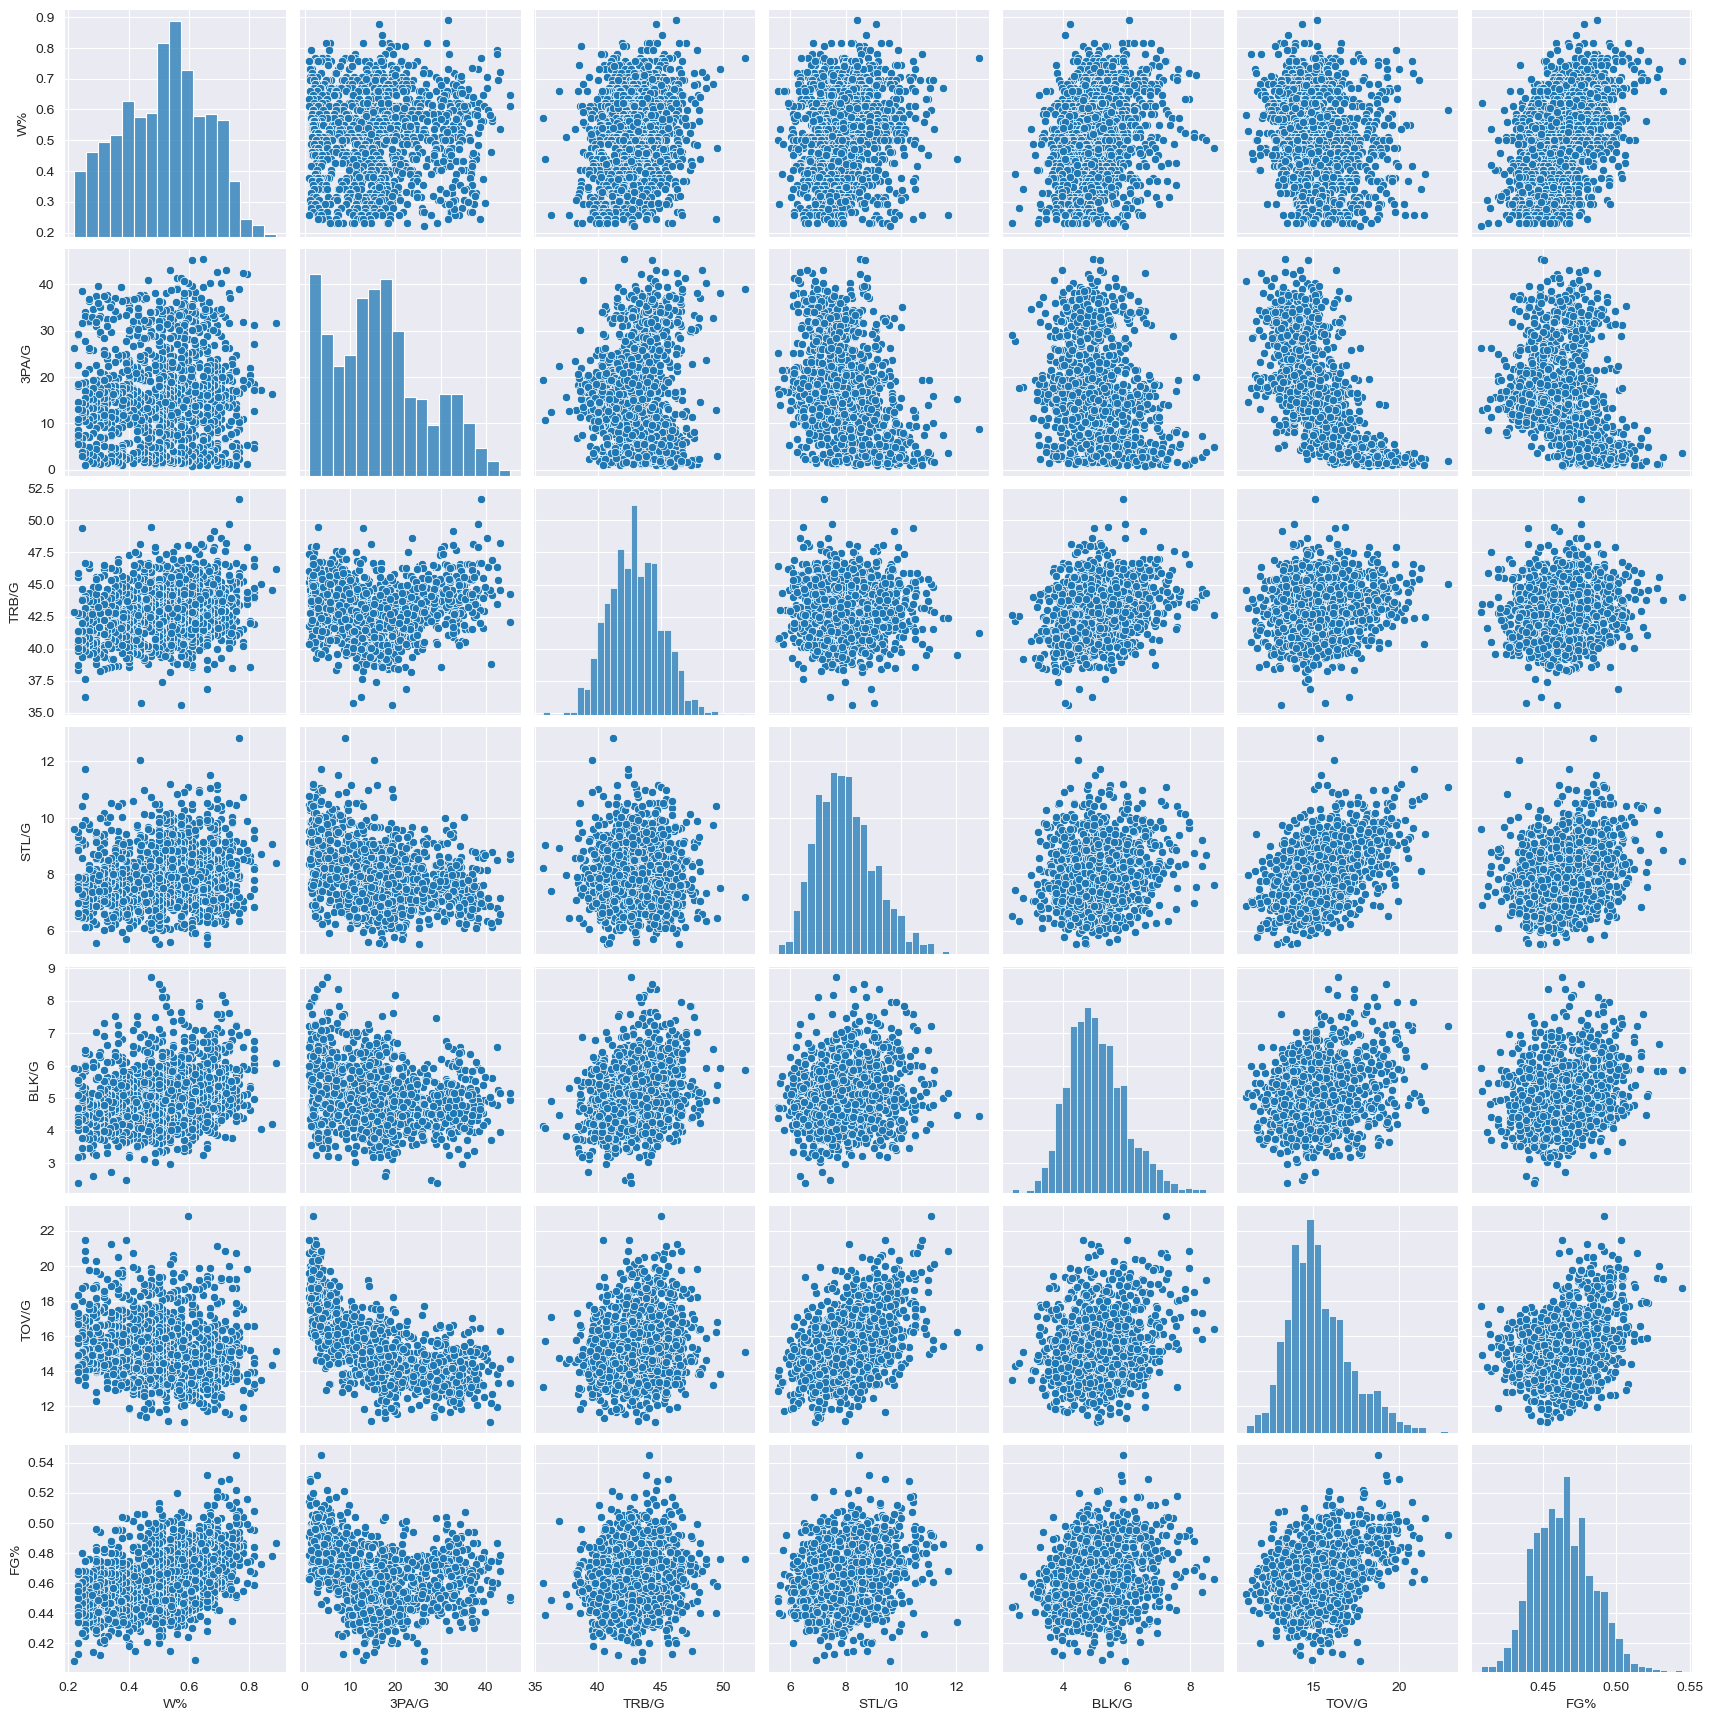

In [13]:
pplot_cols = ['W%', '3PA/G', 'TRB/G', 'STL/G', 'BLK/G', 'TOV/G', 'FG%']
sns.pairplot(teams_df[pplot_cols])

In [14]:
teams_df.drop(columns=['Team', 'Season']).corr()

0             W         G         L        W%       FG%       2P%       3P%  \
0                                                                             
W      1.000000  0.222467 -0.894812  0.967489  0.463229  0.372495  0.159798   
G      0.222467  1.000000  0.236190 -0.024578  0.182770  0.049024 -0.083050   
L     -0.894812  0.236190  1.000000 -0.975535 -0.377999 -0.348811 -0.197298   
W%     0.967489 -0.024578 -0.975535  1.000000  0.429047  0.366689  0.184124   
FG%    0.463229  0.182770 -0.377999  0.429047  1.000000  0.659980 -0.297531   
2P%    0.372495  0.049024 -0.348811  0.366689  0.659980  1.000000  0.119139   
3P%    0.159798 -0.083050 -0.197298  0.184124 -0.297531  0.119139  1.000000   
FT%    0.161521  0.079641 -0.124517  0.144759  0.172791  0.276754  0.151097   
TS%    0.481542  0.056672 -0.453994  0.477719  0.625490  0.925214  0.305214   
eFG%   0.424380  0.027603 -0.410333  0.425264  0.551098  0.945169  0.352940   
MP/G  -0.035366 -0.039274  0.017265 -0.024528 -0.115650 -0.112655  0.039819   
FG/G   0.211292  0.173427 -0.131176  0.169996  0.777396  0.597411 -0.420916   
FGA/G -0.051332  0.116312  0.104423 -0.086567  0.362637  0.371881 -0.378214   
2P/G   0.091988  0.199466 -0.000344  0.045038  0.658379 -0.003294 -0.720854   
2PA/G -0.033150  0.174999  0.113176 -0.076133  0.422222 -0.301058 -0.725996   
3P/G   0.049517 -0.132152 -0.109868  0.080222 -0.263778  0.507139  0.650737   
3PA/G  0.012722 -0.137427 -0.075610  0.043446 -0.294313  0.496289  0.617520   
FT/G   0.191528  0.156478 -0.119238  0.160266  0.450120 -0.027442 -0.436854   
FTA/G  0.147501  0.133218 -0.086008  0.121363  0.402794 -0.103065 -0.480698   
ORB/G -0.040550  0.104816  0.088412 -0.066839  0.162130 -0.368723 -0.599603   
DRB/G  0.242352 -0.089675 -0.282612  0.269077 -0.000225  0.524175  0.323731   
TRB/G  0.229266  0.000805 -0.228137  0.233745  0.154347  0.227912 -0.213839   
AST/G  0.293478  0.125189 -0.235178  0.266354  0.725821  0.568096 -0.274249   
STL/G  0.135351  0.015239 -0.127924  0.133607  0.269219 -0.015344 -0.380468   
BLK/G  0.226870  0.013300 -0.220028  0.230603  0.208322  0.031749 -0.188615   
TOV/G -0.170525  0.083705  0.208290 -0.193562  0.374115 -0.107505 -0.653712   
PF/G  -0.119771  0.143732  0.185192 -0.157587  0.263854 -0.256487 -0.535263   
PTS/G  0.273934  0.135713 -0.210880  0.243280  0.691272  0.768447 -0.179195   

0           FT%       TS%      eFG%  ...     FTA/G     ORB/G     DRB/G  \
0                                    ...                                 
W      0.161521  0.481542  0.424380  ...  0.147501 -0.040550  0.242352   
G      0.079641  0.056672  0.027603  ...  0.133218  0.104816 -0.089675   
L     -0.124517 -0.453994 -0.410333  ... -0.086008  0.088412 -0.282612   
W%     0.144759  0.477719  0.425264  ...  0.121363 -0.066839  0.269077   
FG%    0.172791  0.625490  0.551098  ...  0.402794  0.162130 -0.000225   
2P%    0.276754  0.925214  0.945169  ... -0.103065 -0.368723  0.524175   
3P%    0.151097  0.305214  0.352940  ... -0.480698 -0.599603  0.323731   
FT%    1.000000  0.435417  0.311920  ... -0.150340 -0.288263  0.239531   
TS%    0.435417  1.000000  0.966291  ... -0.059813 -0.471815  0.505225   
eFG%   0.311920  0.966291  1.000000  ... -0.245304 -0.526433  0.581595   
MP/G  -0.014558 -0.089630 -0.095273  ... -0.002048 -0.025456  0.010268   
FG/G   0.211180  0.455678  0.445150  ...  0.279235  0.337241  0.161175   
FGA/G  0.176831  0.189167  0.233640  ...  0.090568  0.364440  0.246372   
2P/G  -0.025561 -0.116467 -0.202233  ...  0.633256  0.723795 -0.398425   
2PA/G -0.106030 -0.392365 -0.478714  ...  0.631738  0.806906 -0.534051   
3P/G   0.213276  0.545667  0.656362  ... -0.647816 -0.725225  0.690956   
3PA/G  0.195623  0.512552  0.626642  ... -0.645722 -0.711750  0.692593   
FT/G   0.145009  0.062764 -0.159822  ...  0.955702  0.526210 -0.343290   
FTA/G -0.150340 -0.059813 -0.245304  ...  1.000000  0.609421 -0.410419   
ORB/G -0.288263 -0.471815 -0.526433  ...  0.609421  1.000000 -0.536657   
D

In [15]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(teams_df.drop(columns=['Team', 'Season', 'W', 'G', 'L', 'W%', 'MP/G']))

In [16]:
pca = PCA()
pc_df = pca.fit_transform(scaled_df)
explained_variance = pca.explained_variance_ratio_
cum_exp_var = np.cumsum(explained_variance)

<Axes: >

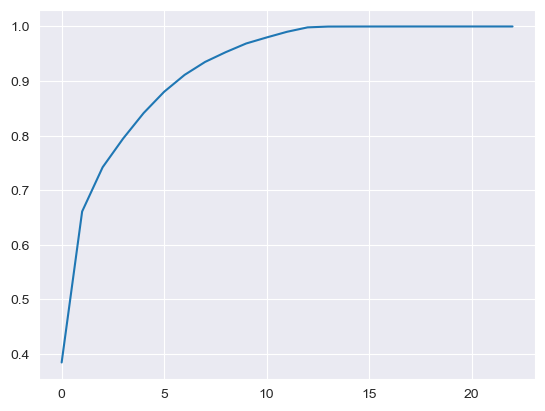

In [17]:
sns.lineplot(x=list(range(0, len(cum_exp_var))), y=cum_exp_var)

In [18]:
n_pcs = 10
pc_df = pd.DataFrame(pc_df)
pc_df = pc_df[list(range(0, n_pcs+1))]

In [19]:
pc_df

0         1         2         3         4         5         6   \
0    -3.161307  5.344337  0.652478  0.971167  1.354539  0.219060 -0.634847   
1     0.039070  0.884122 -0.011400 -0.792637  0.686952 -0.737542 -0.377608   
2    -0.505946  0.791104  0.819866 -1.229009  0.661107  0.075245 -0.090080   
3    -2.590424  6.176462 -0.417405  0.797571  1.579241  0.954590 -1.902283   
4    -2.694018  2.219329  0.014028  0.206640 -0.151385  2.460315 -0.888012   
...        ...       ...       ...       ...       ...       ...       ...   
1195  0.615631 -2.252013 -0.804847 -0.291088  0.348409 -0.221013  0.715928   
1196  2.094019 -1.783652 -2.669963 -0.194124 -0.556138  0.925633 -0.459774   
1197  1.714640 -1.961999 -0.648462 -3.556781  0.295772  0.162430 -0.529570   
1198  3.144214 -1.858305 -0.929188 -0.529871  0.910646 -0.545222  0.391483   
1199 -1.175649 -4.434041  2.626915  0.788223  2.760718 -1.524895 -1.190483   

            7         8         9         10  
0    -0.071632 -1.200302 -1.386908  0.042614  
1    -1.977770 -0.572357 -0.849489 -1.153022  
2    -2.002682  0.210144 -0.914612 -0.937684  
3     0.271816 -0.188685 -0.914651  0.263738  
4    -0.213226  0.793495 -1.084965 -0.203941  
...        ...       ...       ...       ...  
1195 -0.380029 -0.404687 -0.663986 -0.525947  
1196  1.568242 -0.382913  0.387476  0.245168  
1197 -0.445068  0.033001 -0.399874  0.968900  
1198  0.540927 -0.007171  0.150596 -0.212785  
1199  1.366663  0.127924 -0.064531  0.367359  

[1200 rows x 11 columns]

In [20]:
n_clusters = list(range(2, 11))
inertias = []
for n in n_clusters:
    model = KMeans(n_clusters=n, random_state=rand_seed, n_init='auto')
    model.fit(pc_df)
    inertias.append(model.inertia_)

<Axes: >

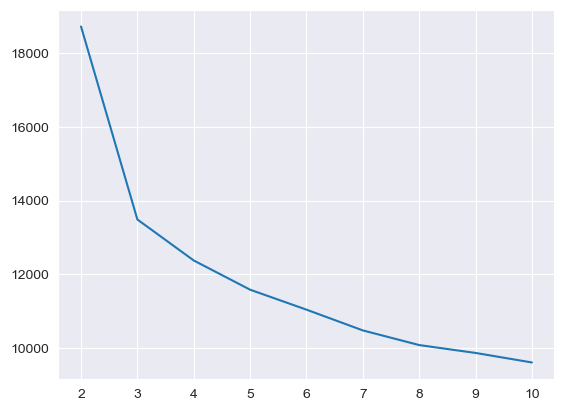

In [21]:
sns.lineplot(x=n_clusters, y=inertias)

In [22]:
n_clusters_kmeans = 3
palette = ['red', 'blue', 'green']
kmeans_clusterer = KMeans(n_clusters=n_clusters_kmeans, random_state=rand_seed, n_init='auto')
kmeans_clusterer.fit(pc_df)
kmeans_labels = kmeans_clusterer.labels_

In [23]:
teams_df['Kmeans cluster'] = kmeans_labels

In [24]:
sns.kdeplot(teams_df, x='W', hue='Kmeans cluster', palette=palette)

<Axes: xlabel='W', ylabel='Density'>

<Axes: xlabel='W', ylabel='Count'>

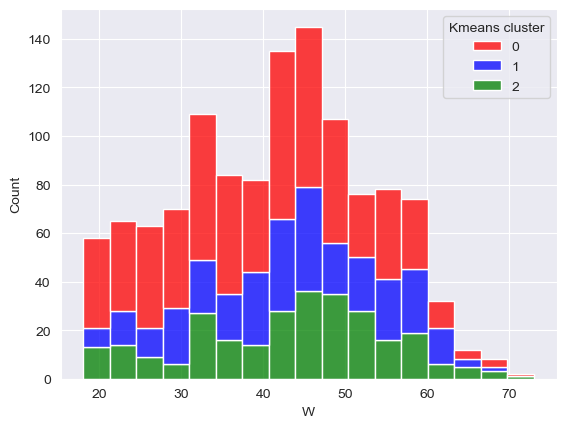

In [25]:
sns.histplot(teams_df, x='W', hue='Kmeans cluster', palette=palette, multiple='stack')

In [26]:
teams_df['Kmeans cluster'].value_counts()

Kmeans cluster
0    601
1    323
2    276
Name: count, dtype: int64

/opt/anaconda3/envs/nba-analytics/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


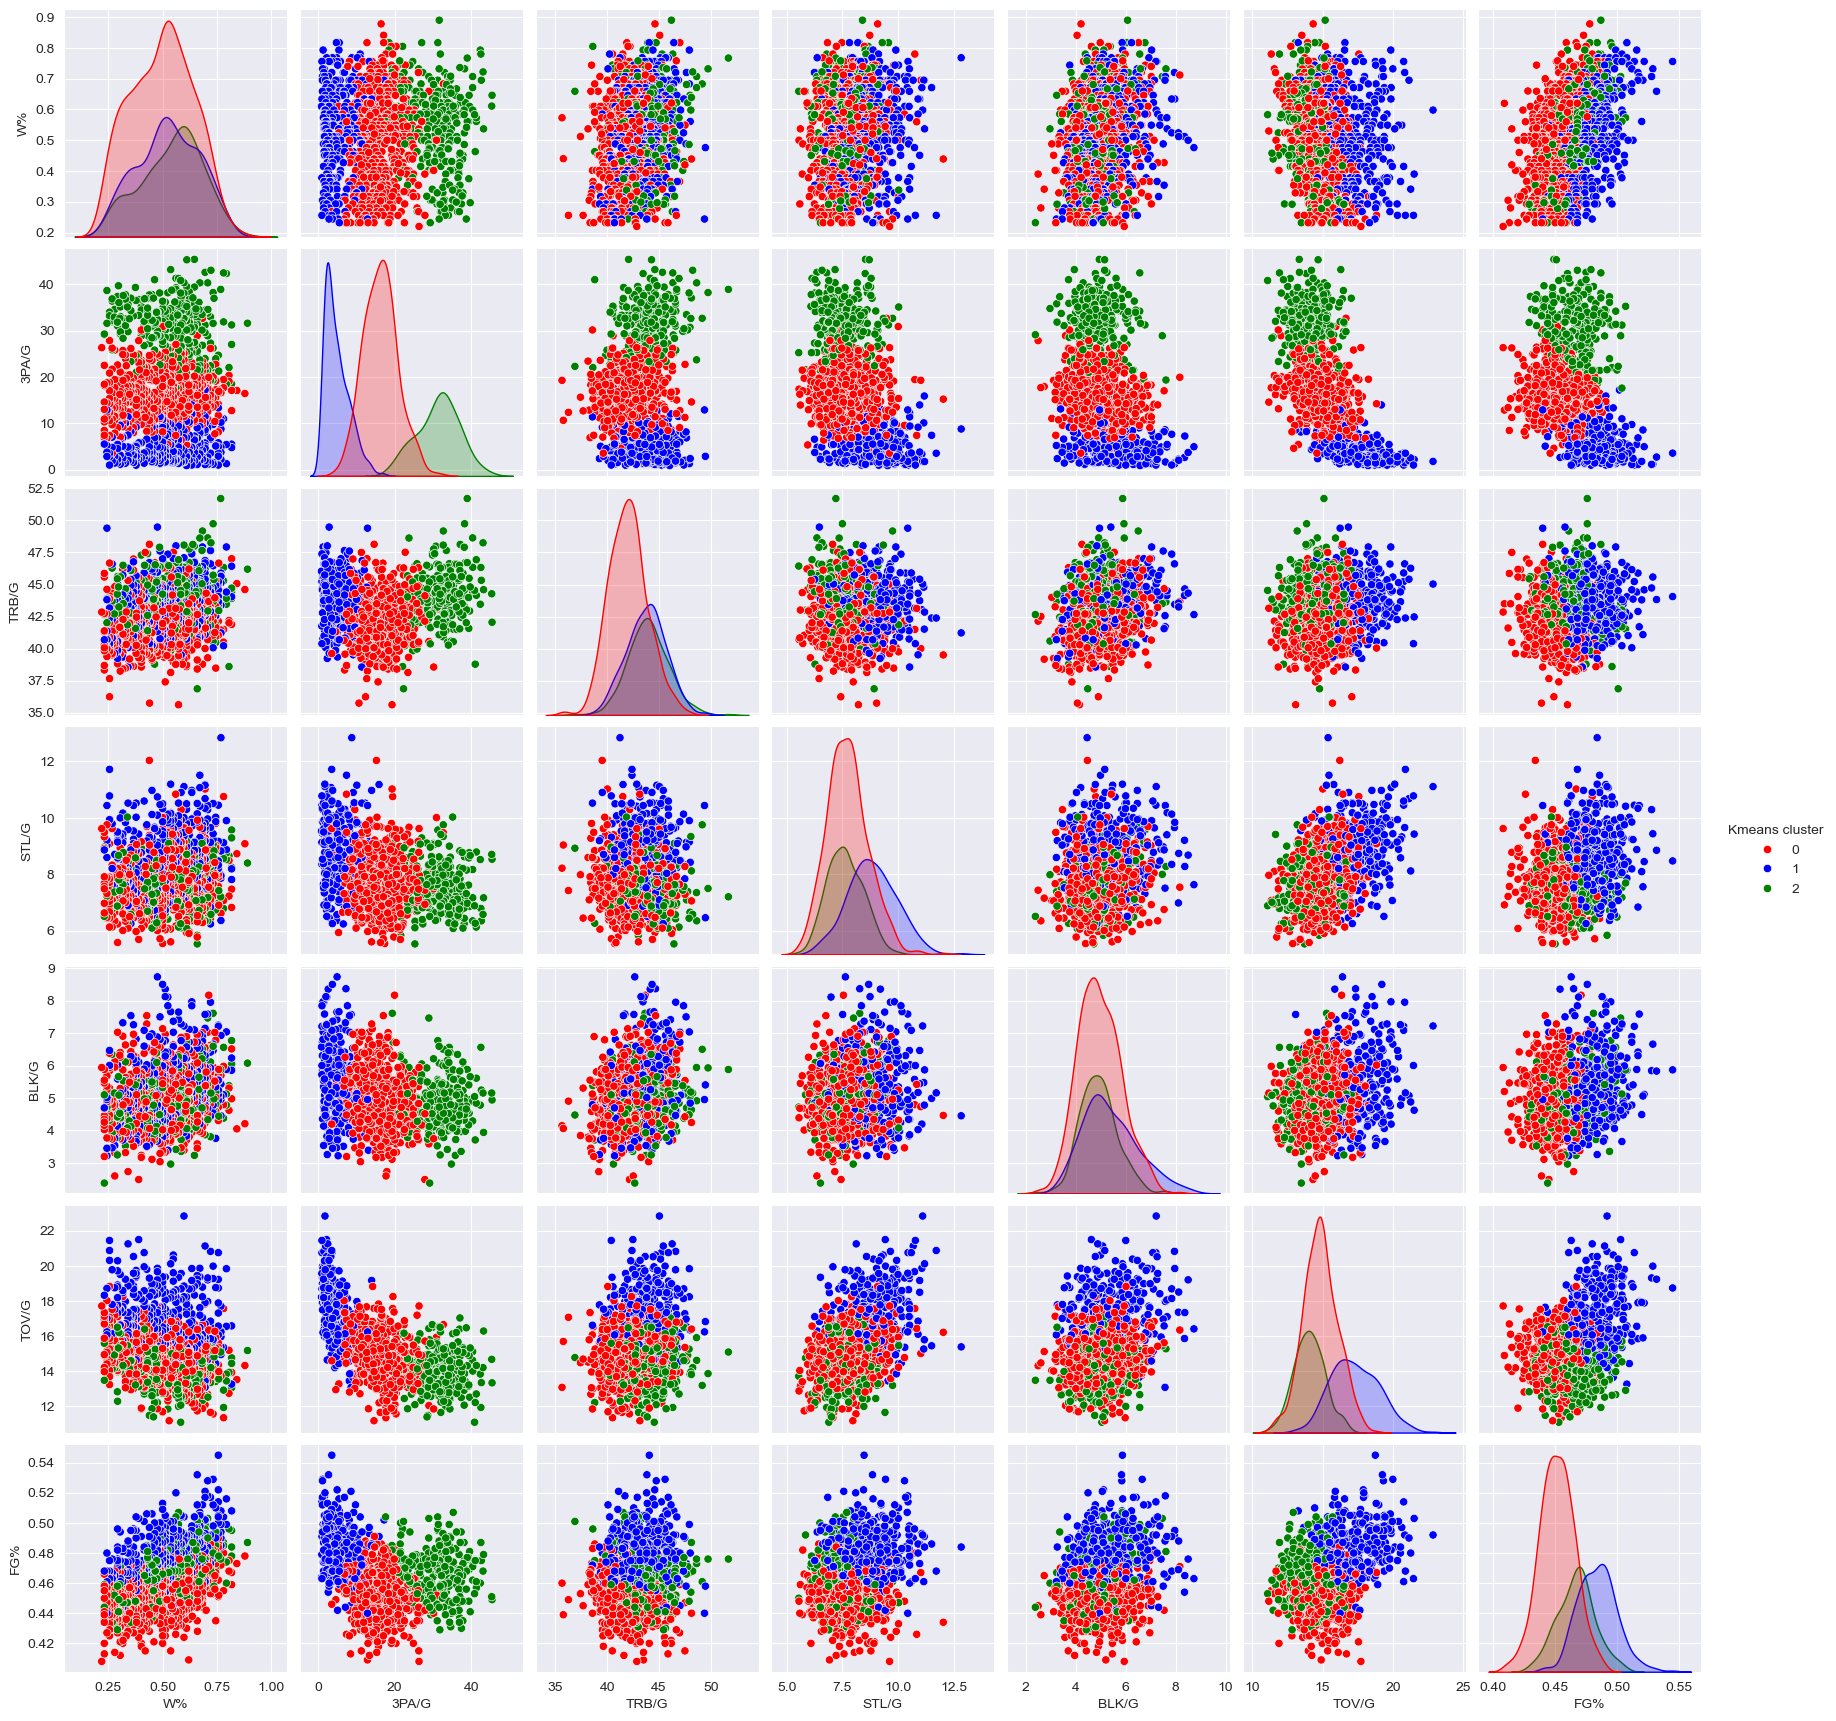

In [27]:
pplot_cols.append('Kmeans cluster')
sns.pairplot(teams_df[pplot_cols], hue='Kmeans cluster', palette=palette)

In [50]:
sns.histplot(teams_df, x='Season', hue='Kmeans cluster', multiple='stack', palette=palette, binwidth=1, binrange=(1979, 2024))

<Axes: xlabel='Season', ylabel='Count'>

In [29]:
for x in [0, 1, 2]:
    print(f'Cluster {x}')
    print(teams_df[teams_df['Kmeans cluster'] == x]['Season'].value_counts())

Cluster 0
Season
2001    29
2003    29
2006    29
2005    29
2011    28
2000    27
2002    27
1995    27
2008    27
1999    27
1997    26
2004    26
1996    26
2012    26
2010    25
2009    25
2007    23
1998    23
1994    21
2014    21
2013    20
2015    17
1993    13
1991     6
2016     6
1989     5
1992     5
1990     4
2017     3
1988     1
Name: count, dtype: int64
Cluster 1
Season
1984    23
1990    23
1983    23
1988    23
1985    23
1987    22
1986    22
1982    22
1980    22
1979    21
1981    21
1992    21
1991    20
1989    19
1993    13
1994     3
1996     1
2007     1
Name: count, dtype: int64
Cluster 2
Season
2021    30
2018    29
2020    29
2019    29
2022    29
2023    28
2017    27
2016    24
2015    11
2013     9
2014     7
2007     5
2010     4
2012     4
2009     3
1994     2
2008     2
2006     1
2004     1
2005     1
2011     1
Name: count, dtype: int64


In [51]:
cluster_names = {0: '1994-2015', 1: 'Pre-1994', 2: 'Post-2015'}
teams_df['Kmeans cluster'] = teams_df['Kmeans cluster'].apply(lambda x: cluster_names[x])

<Axes: xlabel='Season', ylabel='Count'>

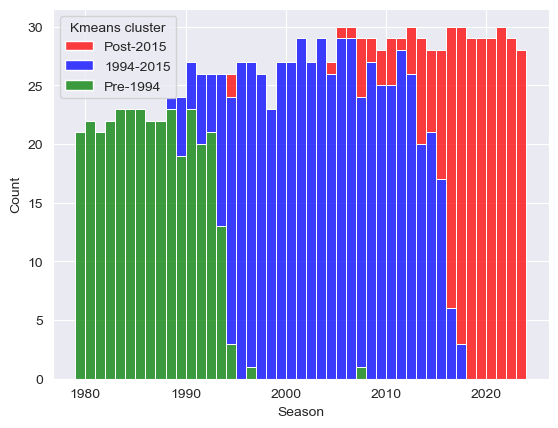

In [52]:
sns.histplot(teams_df, x='Season', hue='Kmeans cluster', multiple='stack', palette=palette, binwidth=1, binrange=(1979, 2024))

In [63]:
stats_pre1994 = teams_df[teams_df['Kmeans cluster']=='Pre-1994'].describe().iloc[1:3]
stats_1994_2015 = teams_df[teams_df['Kmeans cluster']=='1994-2015'].describe().iloc[1:3]
stats_post2015 = teams_df[teams_df['Kmeans cluster']=='Post-2015'].describe().iloc[1:3]
stats_all_eras = teams_df.describe().iloc[1:3]

In [64]:
stats_pre1994 - stats_all_eras

0        Season         W         G         L        W%       FG%       2P%  \
mean -16.263349  1.694525  1.514167 -0.180359  0.010963  0.020252  0.001702   
std   -8.321499 -0.329215 -5.407325 -0.368379 -0.002424 -0.004473 -0.010797   

0          3P%       FT%       TS%  ...     FTA/G     ORB/G     DRB/G  \
mean -0.050931  0.000046 -0.002023  ...  3.429211  2.174391 -1.348398   
std   0.010092 -0.002648 -0.005727  ... -0.845306 -0.650330 -0.865091   

0        TRB/G     AST/G     STL/G     BLK/G     TOV/G      PF/G     PTS/G  
mean  0.825994  2.308147  0.834290  0.323091  1.970905  2.346651  5.275014  
std  -0.224467 -0.655670  0.018464  0.164533 -0.138686 -0.370955 -2.702733  

[2 rows x 29 columns]

In [65]:
stats_1994_2015 - stats_all_eras

0       Season         W         G         L        W%       FG%       2P%  \
mean  1.483863 -1.749271 -0.459211  1.290060 -0.018037 -0.012303 -0.016238   
std  -5.978537 -0.046119  1.470365  0.332606 -0.000266 -0.005951 -0.009846   

0          3P%       FT%       TS%  ...     FTA/G     ORB/G     DRB/G  \
mean  0.015102 -0.006963 -0.010987  ... -0.622378 -0.265855 -0.646059   
std  -0.024247 -0.000771 -0.005816  ... -0.747285 -0.556539 -0.622257   

0        TRB/G     AST/G     STL/G     BLK/G    TOV/G      PF/G     PTS/G  
mean -0.911914 -1.736406 -0.273136 -0.104667 -0.48224 -0.291862 -5.922907  
std  -0.239867 -0.834661 -0.146815 -0.062881 -0.58614 -0.586398 -3.307875  

[2 rows x 29 columns]

In [66]:
stats_post2015 - stats_all_eras

0        Season         W         G        L        W%       FG%       2P%  \
mean  15.801667  1.826014 -0.772065 -2.59808  0.026447  0.003090  0.033367   
std   -8.355512 -0.046329 -0.876868 -0.73362 -0.001573 -0.005122 -0.004125   

0          3P%       FT%       TS%  ...     FTA/G     ORB/G     DRB/G  \
mean  0.026718  0.015109  0.026292  ... -2.657920 -1.965758  2.984833   
std  -0.029612 -0.000927 -0.004809  ... -1.112914 -0.873709 -0.641237   

0        TRB/G     AST/G     STL/G     BLK/G     TOV/G      PF/G     PTS/G  
mean  1.019074  1.079885 -0.381598 -0.150194 -1.256435 -2.110723  6.724049  
std  -0.118773 -0.512118 -0.279009 -0.182007 -0.737881 -1.006256 -2.591537  

[2 rows x 29 columns]

In [68]:
sns.kdeplot(teams_df, x='2PA/G', hue='Kmeans cluster', palette=palette)

<Axes: xlabel='2PA/G', ylabel='Density'>

<Axes: xlabel='3PA/G', ylabel='Density'>

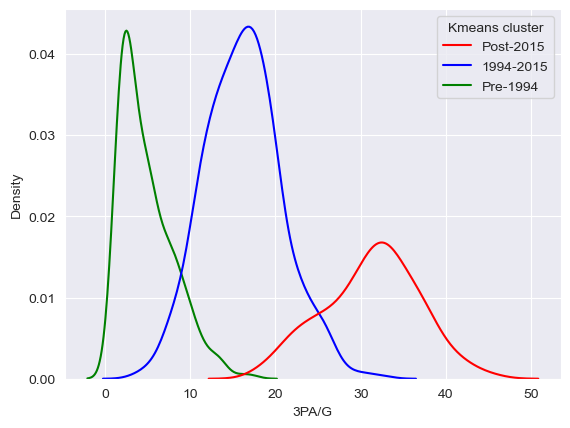

In [69]:
sns.kdeplot(teams_df, x='3PA/G', hue='Kmeans cluster', palette=palette)

<Axes: xlabel='STL/G', ylabel='Density'>

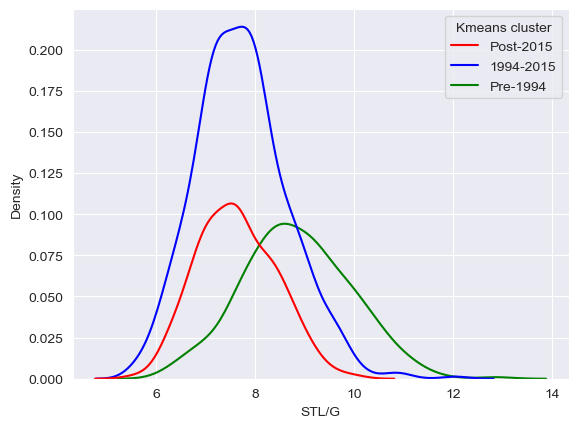

In [70]:
sns.kdeplot(teams_df, x='STL/G', hue='Kmeans cluster', palette=palette)

<Axes: xlabel='BLK/G', ylabel='Density'>

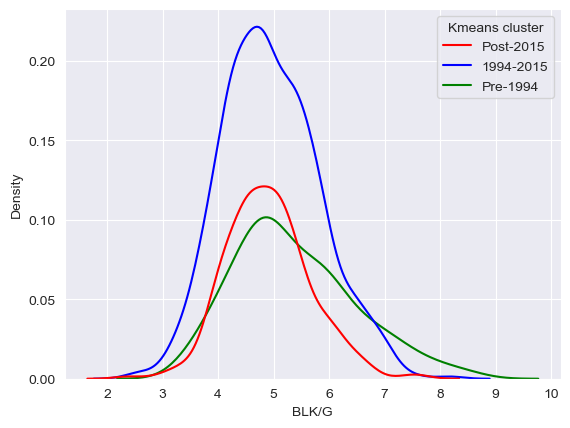

In [71]:
sns.kdeplot(teams_df, x='BLK/G', hue='Kmeans cluster', palette=palette)

<Axes: xlabel='TOV/G', ylabel='Density'>

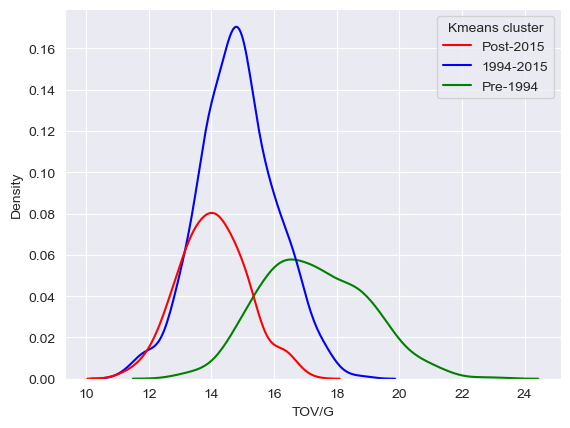

In [72]:
sns.kdeplot(teams_df, x='TOV/G', hue='Kmeans cluster', palette=palette)

<Axes: xlabel='PTS/G', ylabel='Density'>

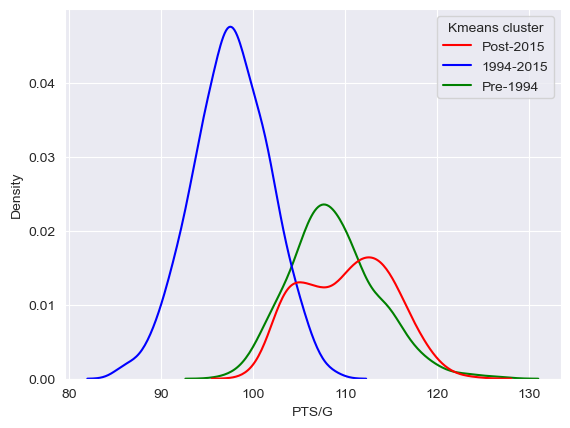

In [73]:
sns.kdeplot(teams_df, x='PTS/G', hue='Kmeans cluster', palette=palette)

<Axes: xlabel='PF/G', ylabel='Density'>

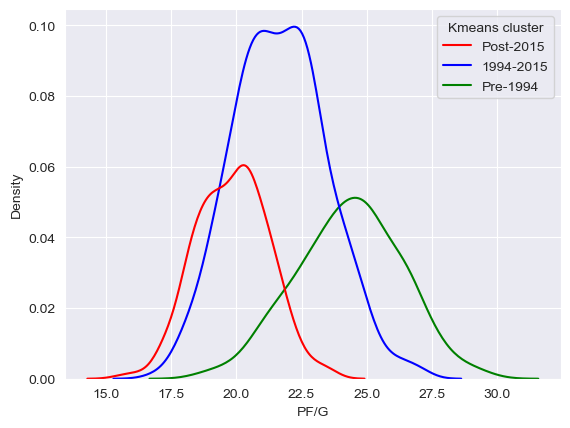

In [74]:
sns.kdeplot(teams_df, x='PF/G', hue='Kmeans cluster', palette=palette)